In [1]:
import os, sys    # for handling paths
import h5py as h5  #for handling data format
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [7]:
def restrict(df, col, lower_limit, upper_limit):
    mask = (df[col] >= lower_limit) & (df[col] <= upper_limit)
    return df[mask]

Checking the evolution of BSE_Detailed_Output_29 with a = 1.56, essentially merges on ZAMS 

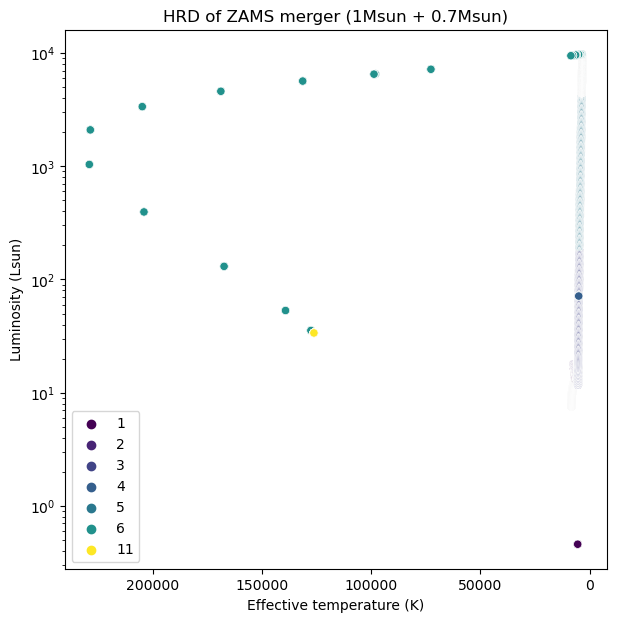

In [5]:
df = pd.read_csv('BSE_Detailed_Output_29.csv', sep = ',', header = 2)
plt.figure(figsize=(7, 7))
sns.scatterplot(data=df, x='        Teff(1)         ', y='     Luminosity(1)      ', hue='Stellar_Type(1)', palette='viridis', legend='full')
#plt.xlim((5000,6500))
plt.gca().invert_xaxis()
plt.title('HRD of ZAMS merger (1Msun + 0.7Msun)')
plt.xlabel('Effective temperature (K)')
plt.ylabel('Luminosity (Lsun)')
plt.yscale('log')
plt.legend()
#plt.ylim((6e-1,2e0))

Checking the evolution of the primary in BSE_Detailed_Output_50, which experiences stable mass transfer & donates mass to its companion, becomes a He WD 

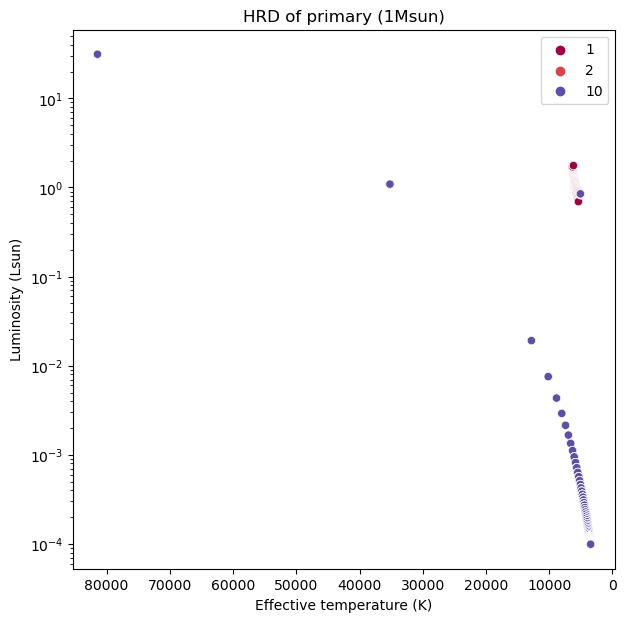

In [5]:
df = pd.read_csv('BSE_Detailed_Output_50.csv', sep = ',', header = 2)
plt.figure(figsize=(7, 7))
sns.scatterplot(data=df, x='        Teff(1)         ', y='     Luminosity(1)      ', hue='Stellar_Type(1)', palette='Spectral', legend='full')
#plt.xlim((5000,6500))
plt.gca().invert_xaxis()
plt.title('HRD of primary (1Msun)')
plt.xlabel('Effective temperature (K)')
plt.ylabel('Luminosity (Lsun)')
plt.yscale('log')
plt.legend()
#plt.ylim((6e-1,2e0))

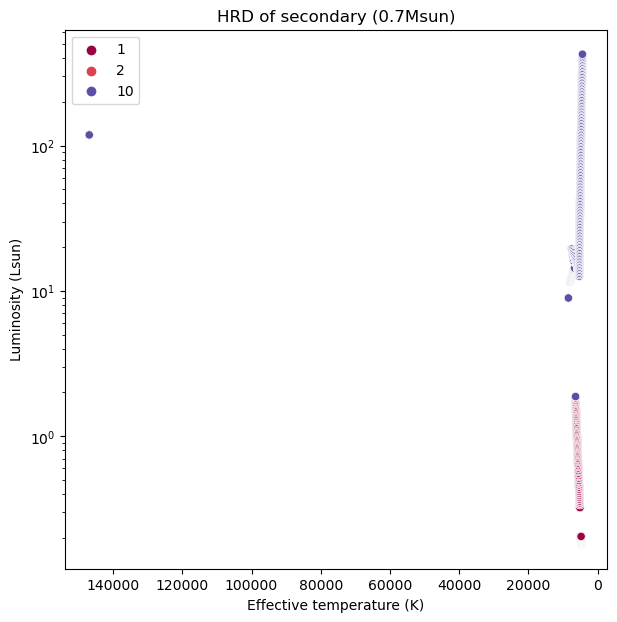

In [18]:
plt.figure(figsize=(7, 7))
sns.scatterplot(data=df, x='        Teff(2)         ', y='     Luminosity(2)      ', hue='Stellar_Type(1)', palette='Spectral', legend='full')
plt.gca().invert_xaxis()
plt.title('HRD of secondary (0.7Msun)')
plt.xlabel('Effective temperature (K)')
plt.ylabel('Luminosity (Lsun)')
plt.yscale('log')
plt.legend()

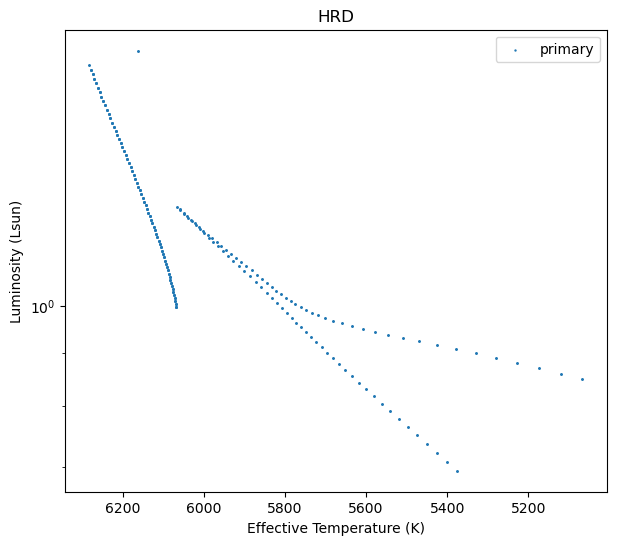

In [8]:
df1 = restrict(df, 'Stellar_Type(1)', 0, 1) #MS stars only
plt.figure(figsize=(7,6))
plt.scatter(df1['        Teff(1)         '], df1['     Luminosity(1)      '], s = 0.5, label = 'primary')
plt.xlabel('Effective Temperature (K)')
plt.ylabel('Luminosity (Lsun)')
plt.gca().invert_xaxis()
plt.yscale('log')
plt.title('HRD')
plt.legend()

In [2]:
M1_init = 1 #Msun, primary
M2_init = 0.7 #Msun, secondary

In [4]:
ZAMS_merger_a = []
overcontact_a = []
MS_merger_a = []
beyond_MS_merger_a = []
no_merger_a = []
MS_MT_a = []
non_MS_MT_a = []
no_MT_a = []
MS_types = [0,1]

for n in range(0,100):
    df = pd.read_csv('BSE_Detailed_Output_'+str(n)+'.csv', sep = ',', header = 2)
    M1_0 = float(df['        Mass(1)         '][0])
    M2_0 = float(df['        Mass(2)         '][0])
    a_0 = float(df['     SemiMajorAxis      '][0])
    if M1_0 == M2_0 and M1_0 == (M1_init+M2_init)/2:
        R1_0 = float(df['       Radius(1)        '][0])
        R2_0 = float(df['       Radius(2)        '][0])
        '''
        if R1_0 + R2_0 < a_0:
            ZAMS_merger_a.append(a_0)
        else:
            overcontact_a.append(a_0)
        '''
        if df['Stellar_Type(1)'][0] == 16: #chemically homogeneous evolution
            ZAMS_merger_a.append(a_0)
        else:
            overcontact_a.append(a_0)
    else:
        merged = False
        MT = False
        for i in range(df.shape[0]):
            type2 = int(df['Stellar_Type(2)'][i])
            type1 = int(df['Stellar_Type(1)'][i])
            if type2 == 15: #mass-less remnant
                if type1 in MS_types:
                    MS_merger_a.append(a_0)
                else:
                    beyond_MS_merger_a.append(a_0)
                merged = True
                break
            if not MT and int(df['MT_History'][i]): #if != 0, there was a mass transfer
                if type1 in MS_types:
                    MS_MT_a.append(a_0)
                else:
                    non_MS_MT_a.append(a_0)
                MT = True
        if not merged:
            no_merger_a.append(a_0)
        if not MT:
            no_MT_a.append(a_0)

MT_History:
- NO MASS TRANSFER = 0
- MASS TRANSFER STABLE STAR1 -> STAR2 = 1
- MASS TRANSFER STABLE STAR2 -> STAR1 = 2
- MASS TRANSFER COMMON ENVELOPE STAR1 -> STAR2 = 3
- MASS TRANSFER COMMON ENVELOPE STAR2 -> STAR1 = 4
- MASS TRANSFER COMMON ENVELOPE DOUBLE CORE = 5
- MASS TRANSFER -> MERGER = 6

Initial semi-major axis resolution:

From 0.00001 to 1 AU = 0.01 AU

From 1 AU to 10 AU = 1 AU

In [5]:
print("Initial (i.e. ZAMS) semi-major axis (in Rsol) for: ")
if ZAMS_merger_a != []:
    print("ZAMS merger: ", ZAMS_merger_a[0], " to ", ZAMS_merger_a[-1])
else: 
    print("No ZAMS merger")
if overcontact_a != []:
    print("Overcontact binaries at ZAMS: ", overcontact_a[0], " to ", overcontact_a[-1])
else:
    print("No overcontact systems at ZAMS")
if MS_merger_a != []:
    print("MS merger (excluding ZAMS merger and overcontact binaries): ", MS_merger_a[0], " to ", MS_merger_a[-1])
else:
    print("No MS mergers (excluding ZAMS merger and overcontact binaries)")
if beyond_MS_merger_a != []:
    print("Merger following Cases B and C: ", beyond_MS_merger_a[0], " to ", beyond_MS_merger_a[-1])
else:
    print("No mergers following Cases B and C")
if MS_MT_a != []:
    print("Mass transfer from MS donor: ", MS_MT_a[0], " to ", MS_MT_a[-1])
else:
    print("No Mass transfer occurred from MS donor")
if non_MS_MT_a != []:
    print("Mass transfer from non-MS donor: ", non_MS_MT_a[0], " to ", non_MS_MT_a[-1])
else:
    print("No Mass transfer occurred from non-MS donor")
if no_merger_a != []:
    print("No merger throughout the evolution: ", no_merger_a[0], " to ", no_merger_a[-1])
if no_MT_a != []:
    print("No mass transfer throughout the evolution: ", no_MT_a[0], " to ", no_MT_a[-1])

Initial (i.e. ZAMS) semi-major axis (in Rsol) for: 
ZAMS merger:  0.002150320290207  to  1.238584487159362
Overcontact binaries at ZAMS:  1.292342494414543  to  2.206228617752614
MS merger (excluding ZAMS merger and overcontact binaries):  2.259986625007795  to  4.30279090070466
No mergers following Cases B and C
Mass transfer from MS donor:  2.259986625007795  to  4.517822929725383
Mass transfer from non-MS donor:  4.571580936980563  to  5.324193038553092
No merger throughout the evolution:  2.69005068304924  to  5.324193038553092


BSE_Detailed_Output_50.csv with initial a = 2.69005068304924 does not merge
also the next a (BSE_Detailed_Output_51.csv) does not merge either

But BSE_Detailed_Output_80.csv with initial a = 4.30279090070466 does actually merge on MS

Could be the result of random sampling of uncontrolled variables 
- eccentricity is set to 0, by default